In [11]:
from chesslab.agent_torch import agent
from chesslab.agent_random import agent as agent_r
from chesslab.tests import versus
from chesslab.agent_mcts import agent_MCTS
import chess
import chess.pgn

In [2]:
import torch.nn as nn
class Model_1(nn.Module):

    def __init__(self):
        super().__init__()
        self.func_1=nn.ELU()
        self.func_2=nn.ELU()
        self.func_3=nn.ELU()
        self.func_4=nn.ELU()
        
        self.cnn_1 = nn.Conv2d(3, 32, kernel_size=7,padding=3)
        self.cnn_2 = nn.Conv2d(32, 64, kernel_size=5,padding=2)
        self.cnn_3 = nn.Conv2d(64, 128, kernel_size=3,padding=1)

        self.linear_1 = nn.Linear(8*8*128,256 )
        self.linear_2 = nn.Linear(256, 2)

    def forward(self, x ):
        out = self.cnn_1(x)
        out = self.func_1(out)
        out = self.cnn_2(out)
        out = self.func_2(out)
        out = self.cnn_3(out)
        out = self.func_3(out)
        out = out.reshape([x.size(0), -1])
        out = self.linear_1(out)
        out = self.func_4(out)
        out = self.linear_2(out)

        return out
model = Model_1()

In [3]:
deepbot = agent(model,'../tmp/test_elo.0.5.pt')
randombot = agent_r()

device: cuda


In [4]:
white_wins,black_wins,draws = versus(agent_white=deepbot,agent_black=randombot)
print("White wins percent: {}\nBlack wins percent: {}\nDraws percent :{}".format(white_wins,black_wins,draws))

Versus test: 100/100

White wins percent: 43
Black wins percent: 0
Draws percent :57


In [14]:
deepMCTS = agent_MCTS(temperature=2,bot=deepbot,game_state=board,verbose=0)

In [15]:
white_wins,black_wins,draws = versus(agent_white=deepMCTS,agent_black=randombot)
print("White wins: {}\nBlack wins: {}\nDraws:{}".format(white_wins,black_wins,draws))

Versus test: 100/100

White wins percent: 97
Black wins percent: 1
Draws percent :2


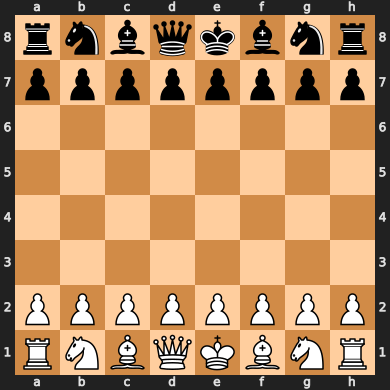

In [5]:
board=chess.Board()
board

In [6]:
game = chess.pgn.Game()
game.headers["White"] = "DeepBot"
game.headers["Black"] = "RandomBot"
game.setup(board)  # Not required for the standard
                   # starting position.

blancas=deepbot
negras=randombot

node = game

In [19]:
a = None
if a is None or 10/0:
    print("ok")

ok


In [7]:
import chess.svg
from IPython.display import display

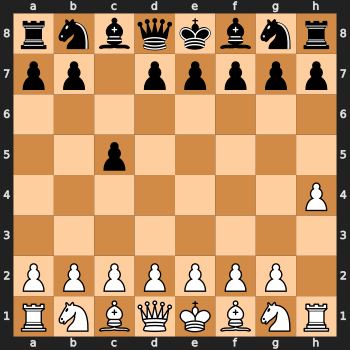

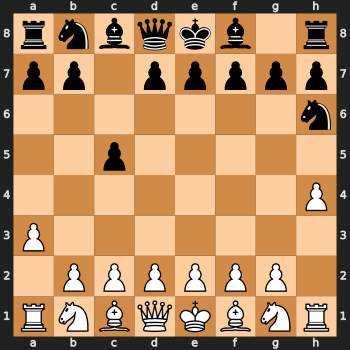

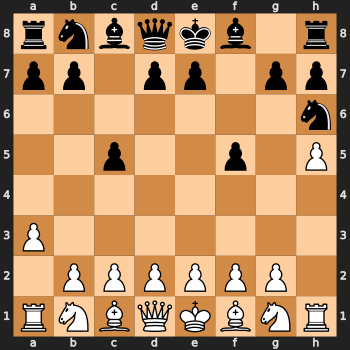

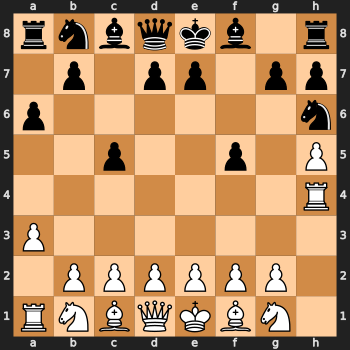

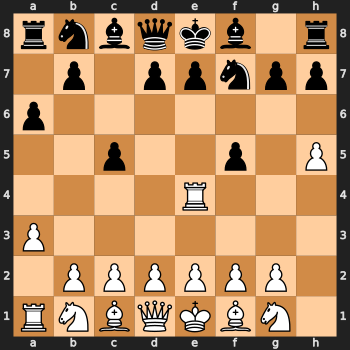

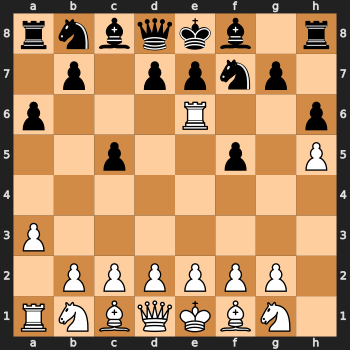

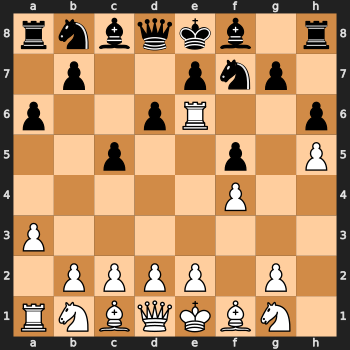

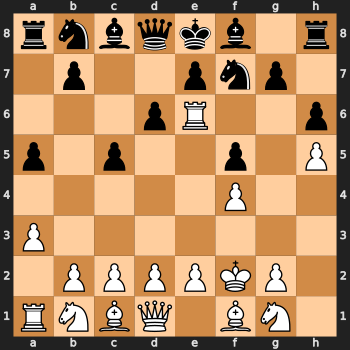

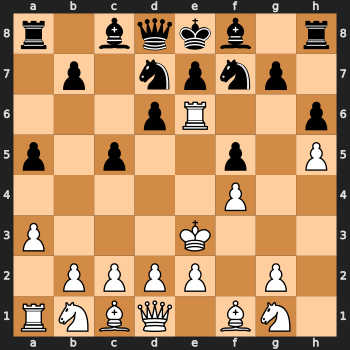

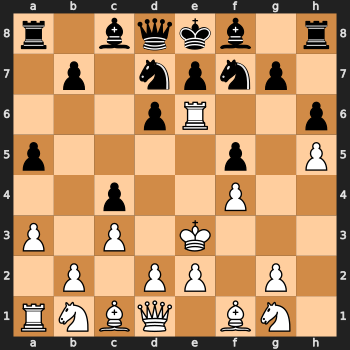

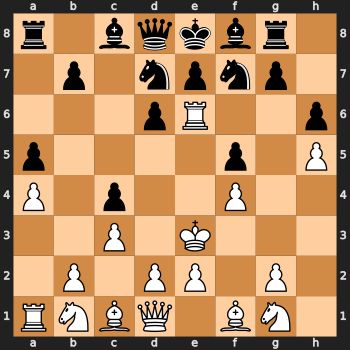

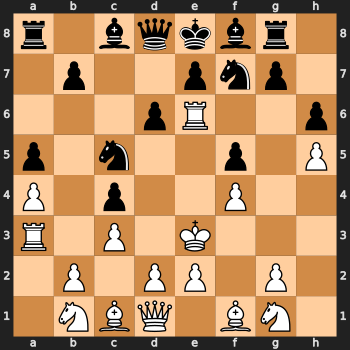

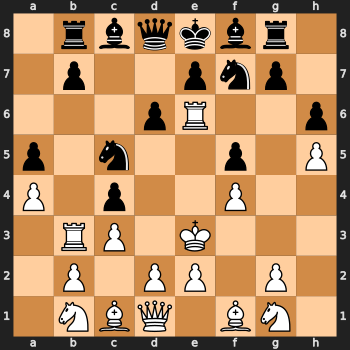

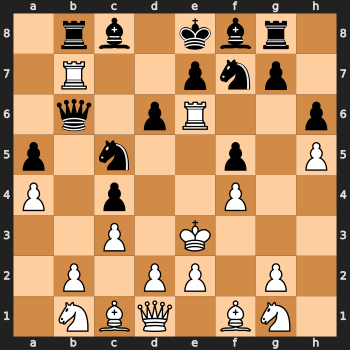

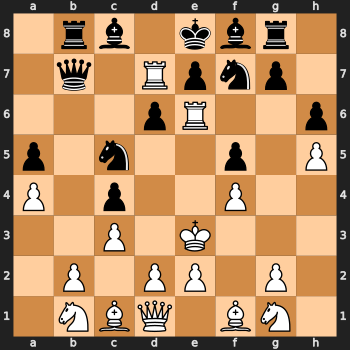

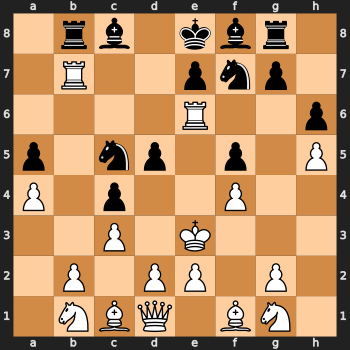

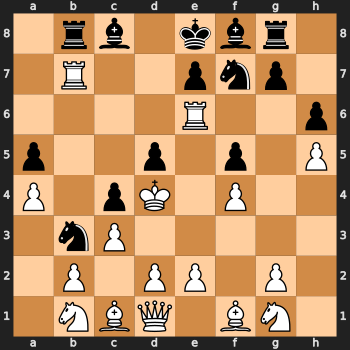

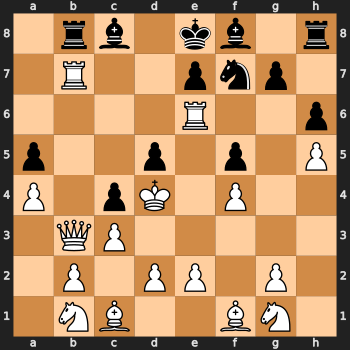

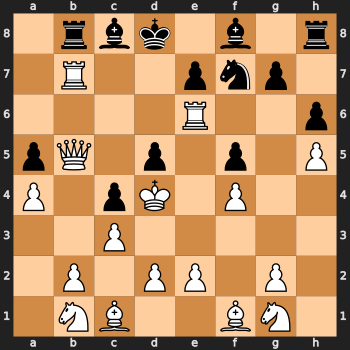

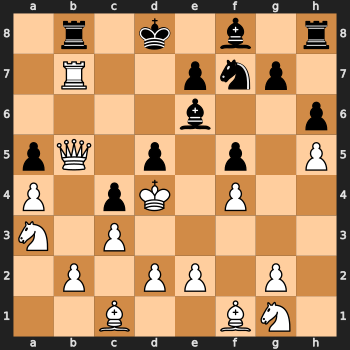

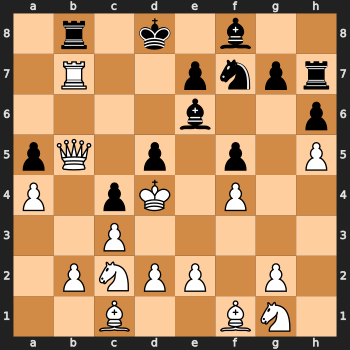

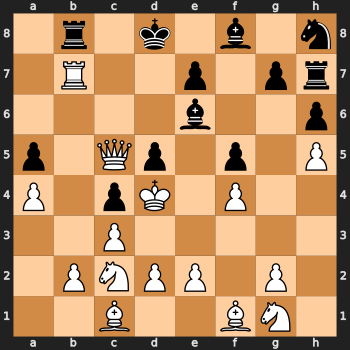

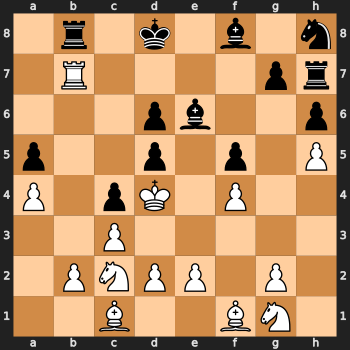

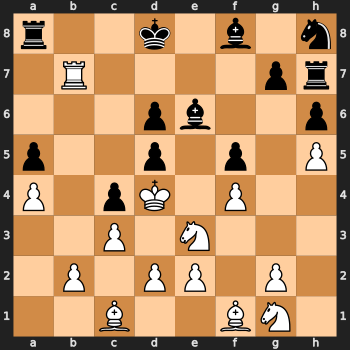

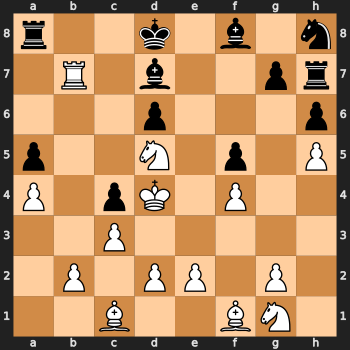

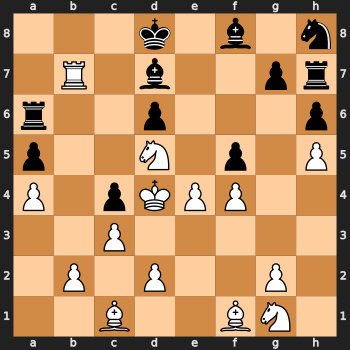

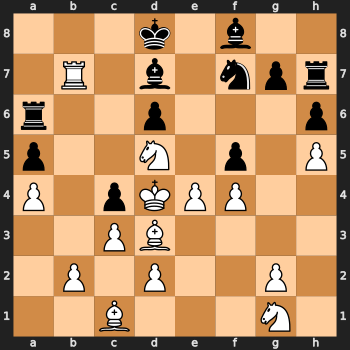

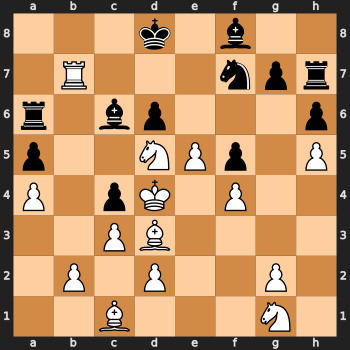

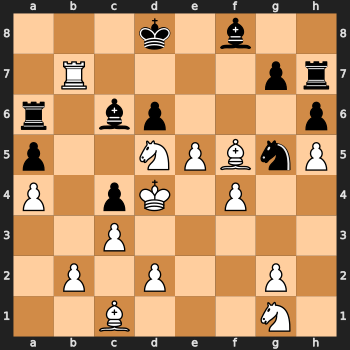

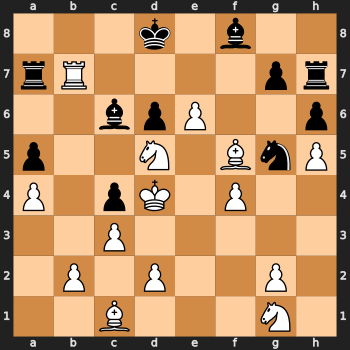

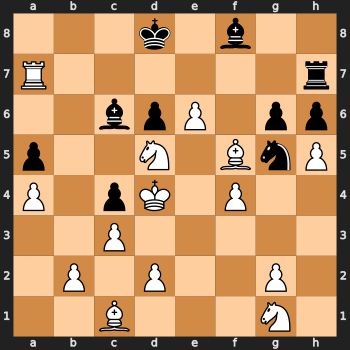

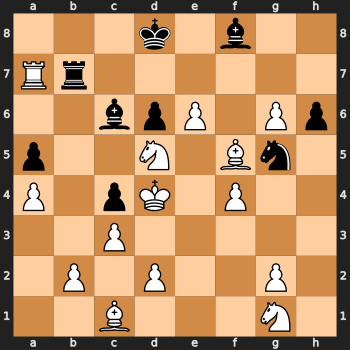

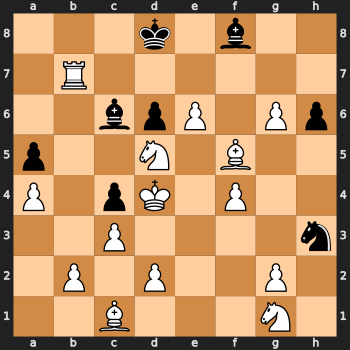

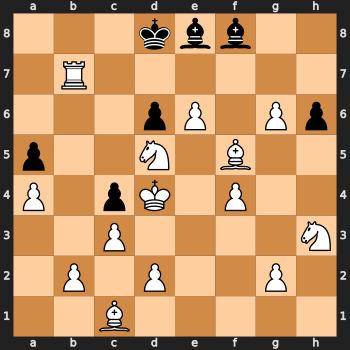

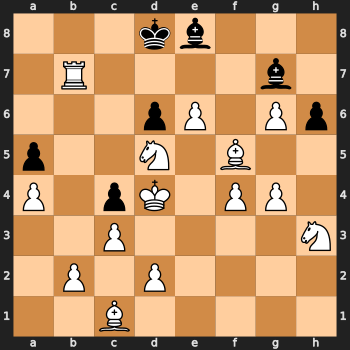

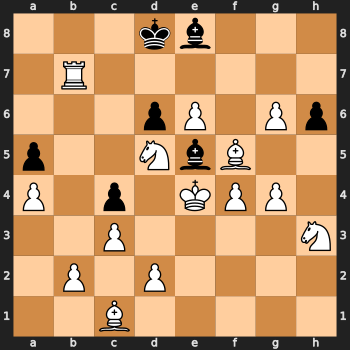

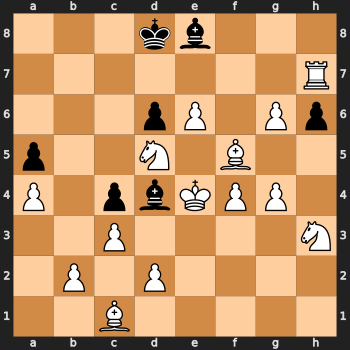

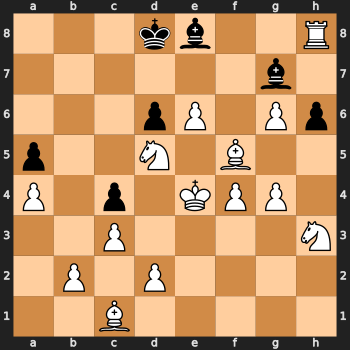

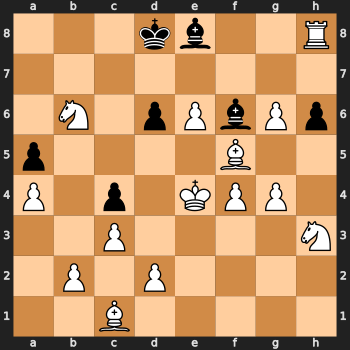

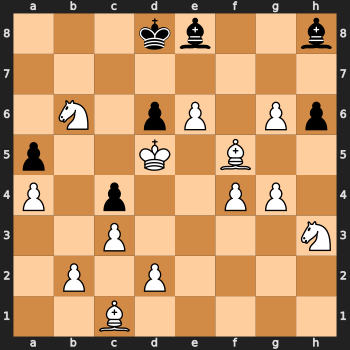

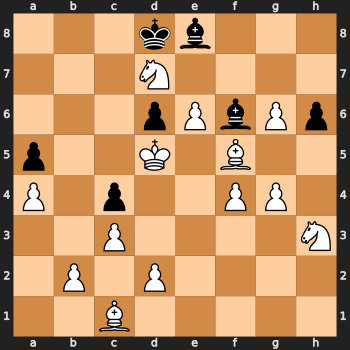

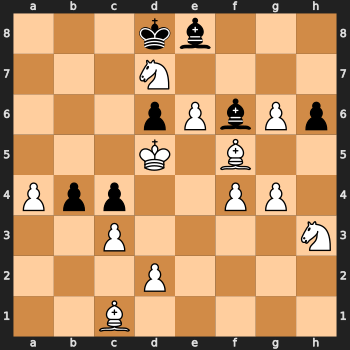

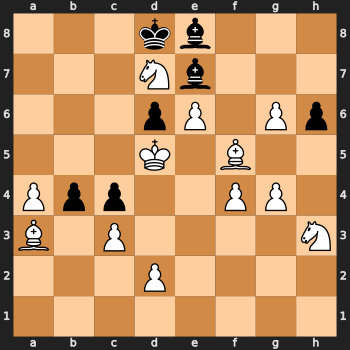

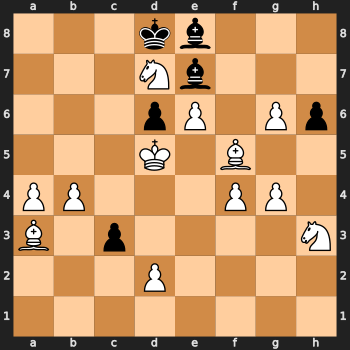

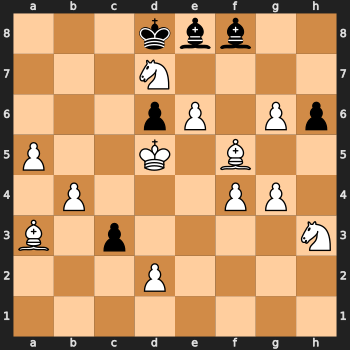

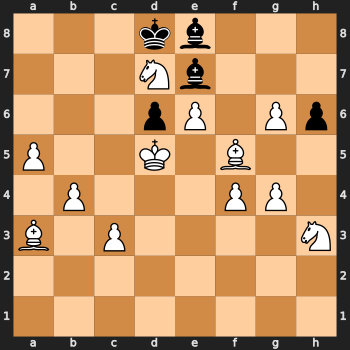

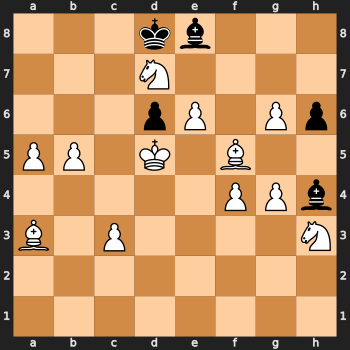

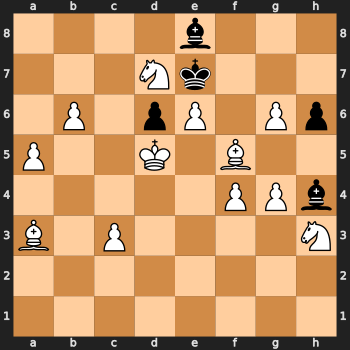

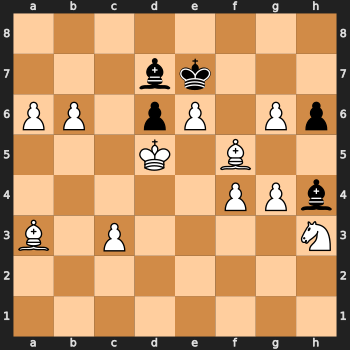

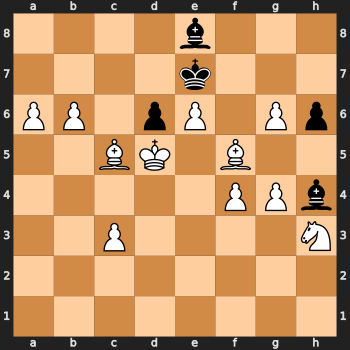

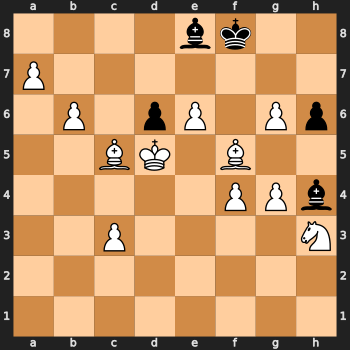

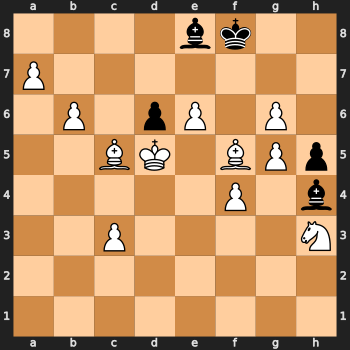

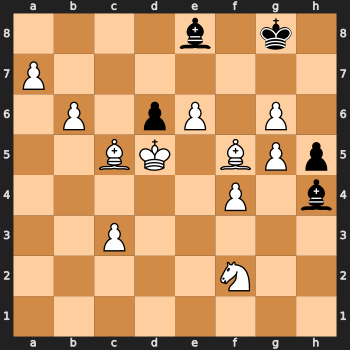

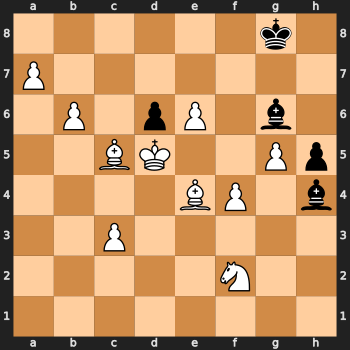

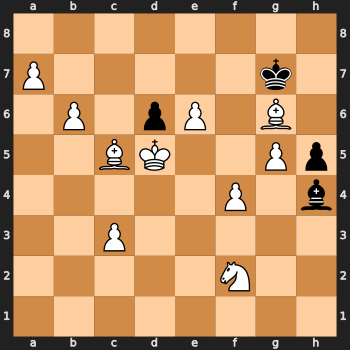

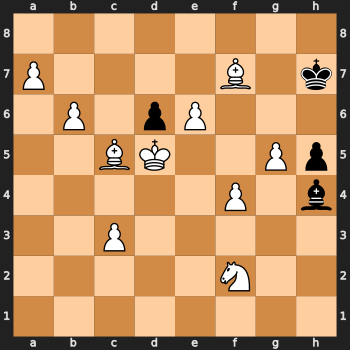

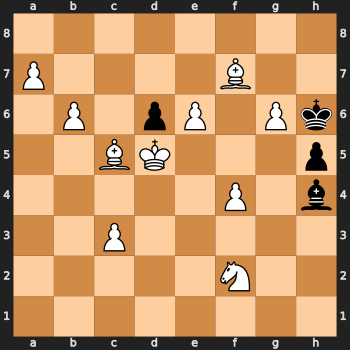

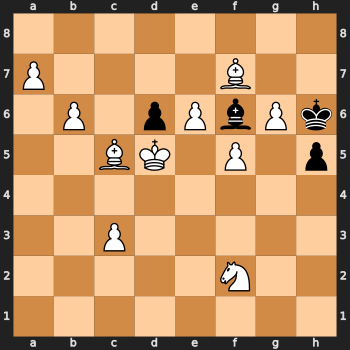

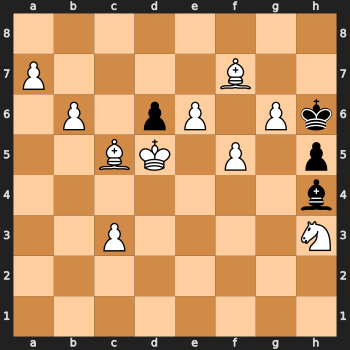

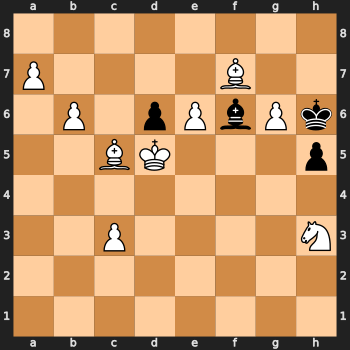

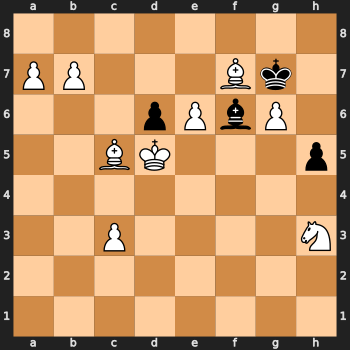

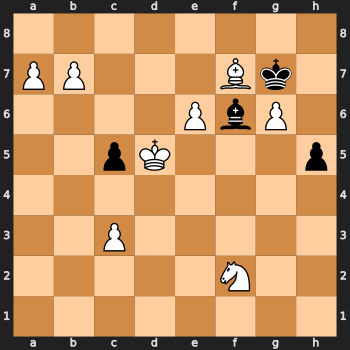

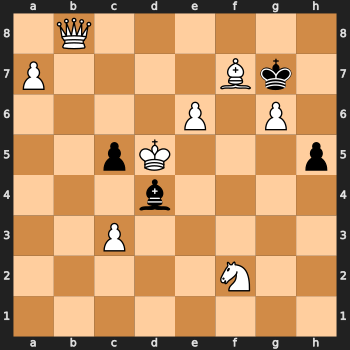

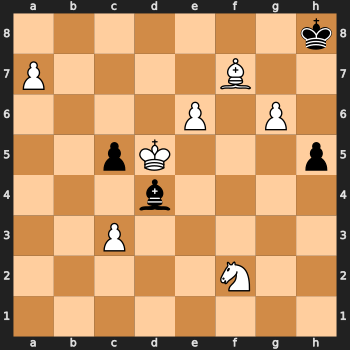

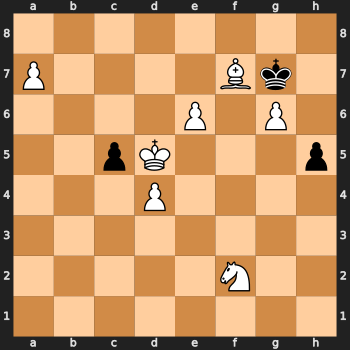

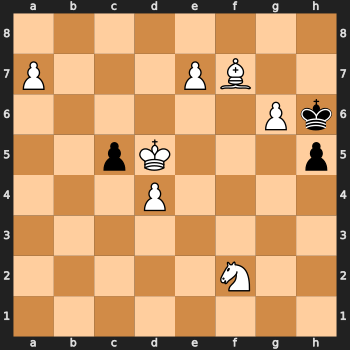

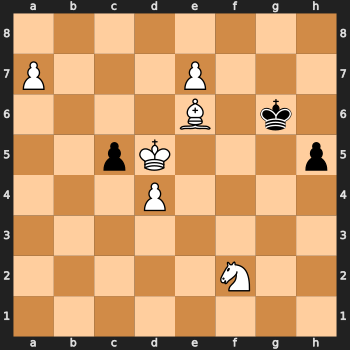

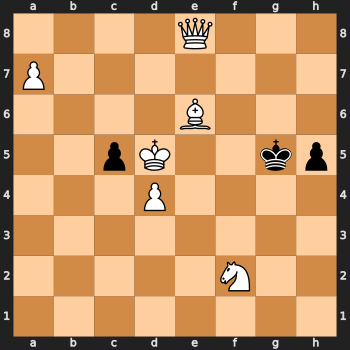

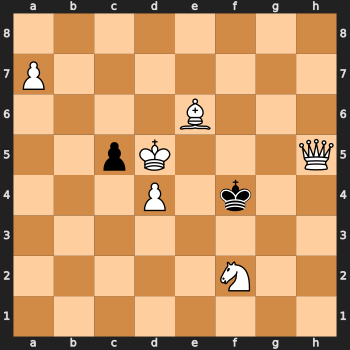

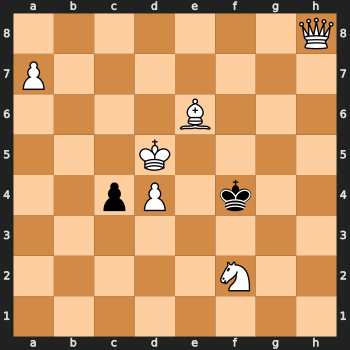

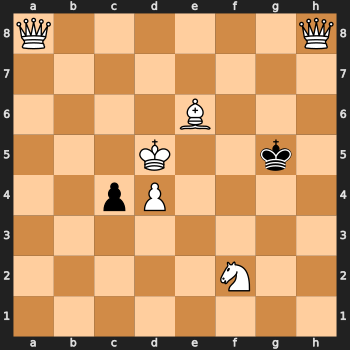

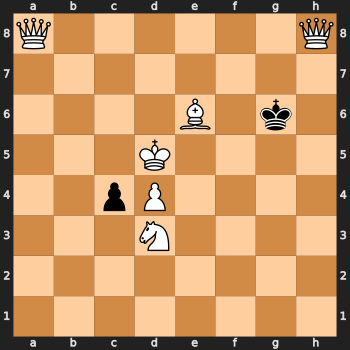

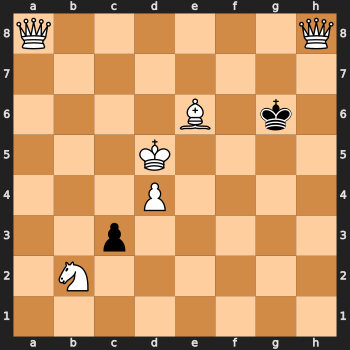

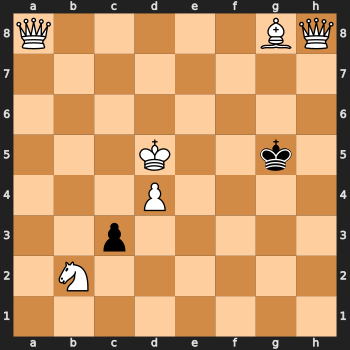

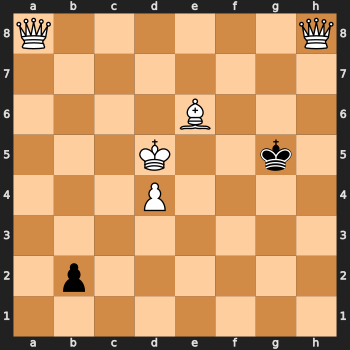

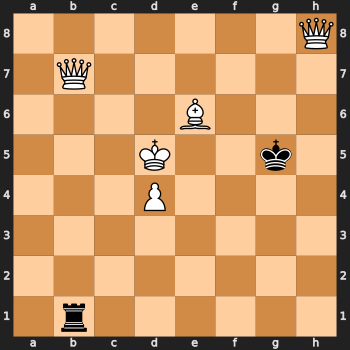

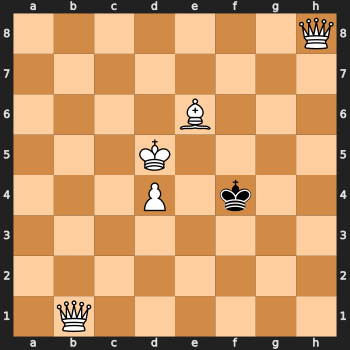

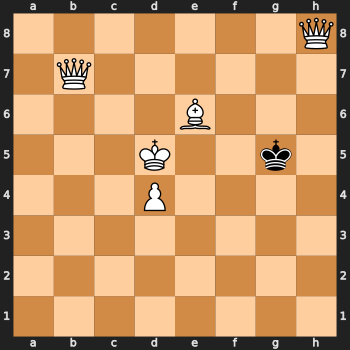

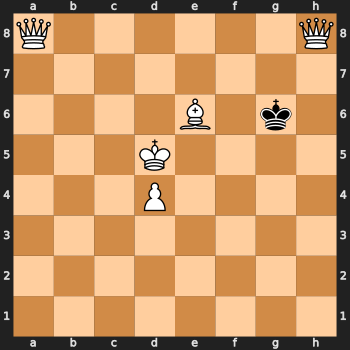

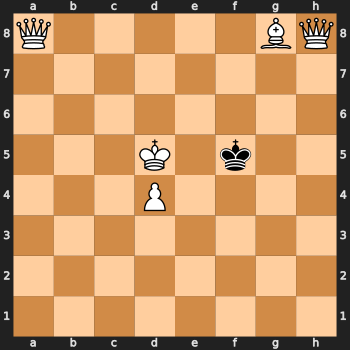

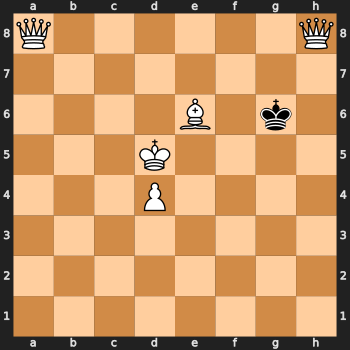

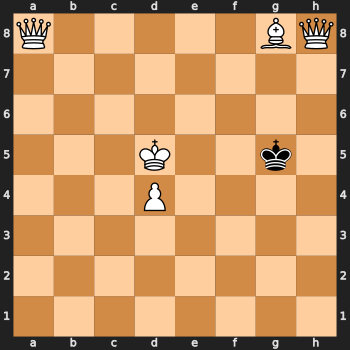

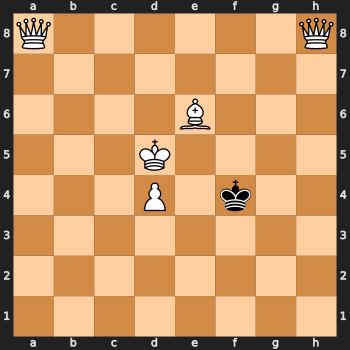

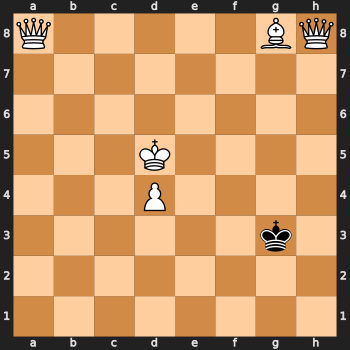

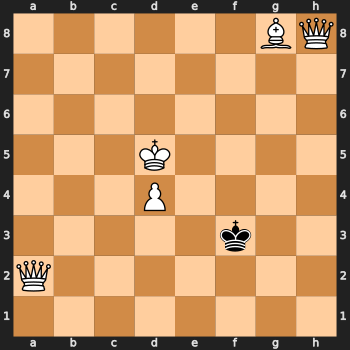

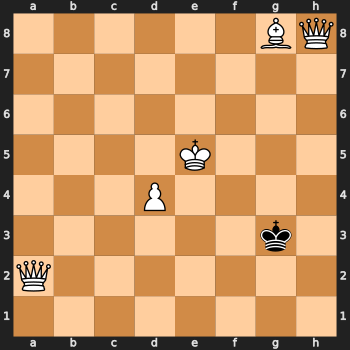

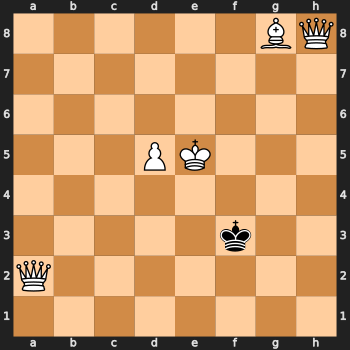

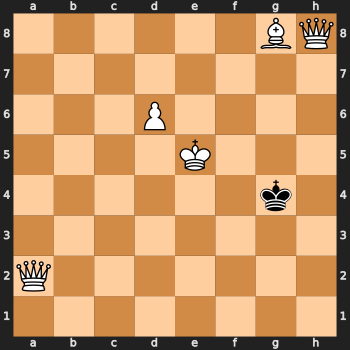

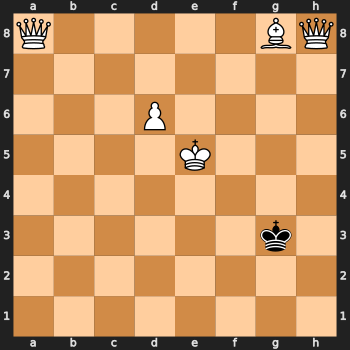

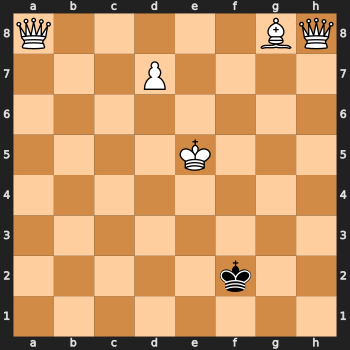

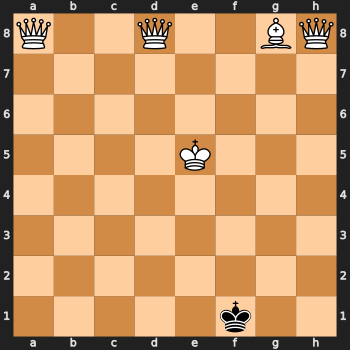

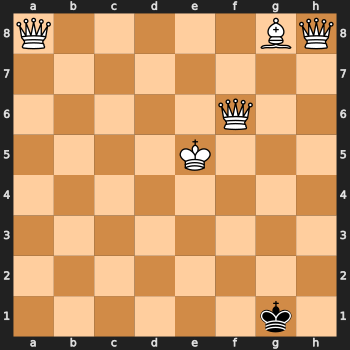

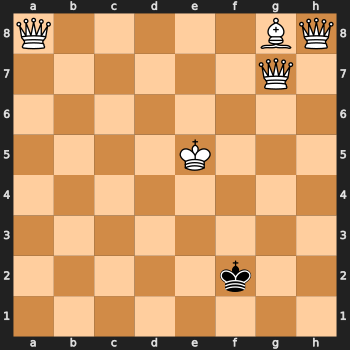

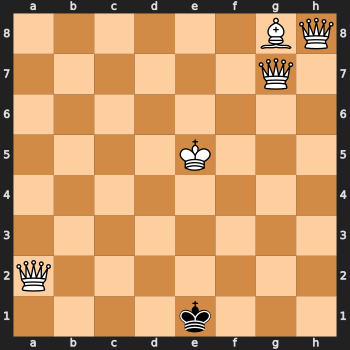

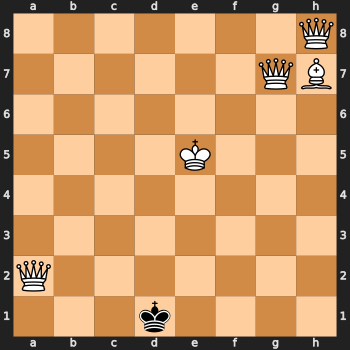

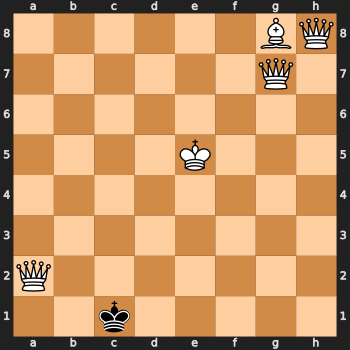

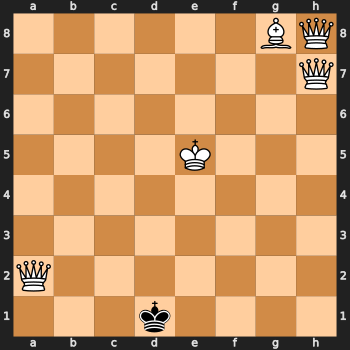

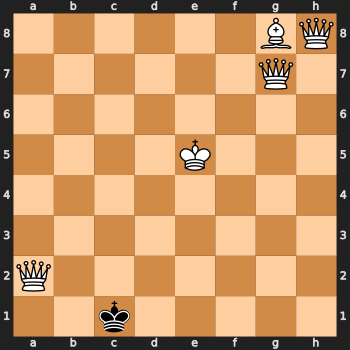

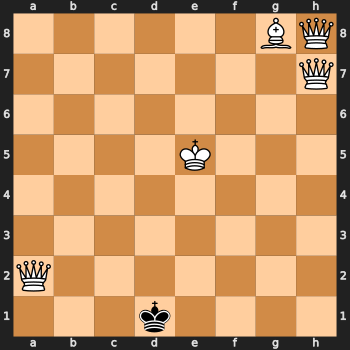

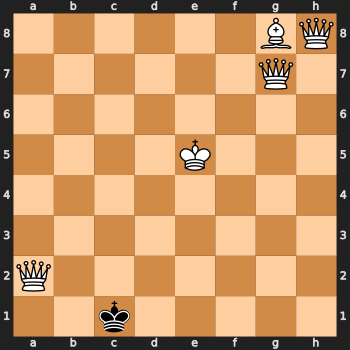

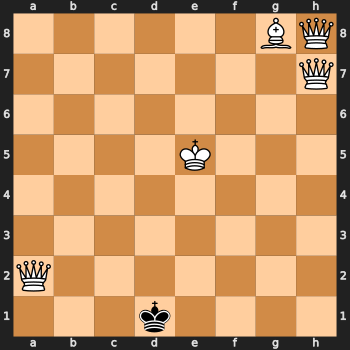

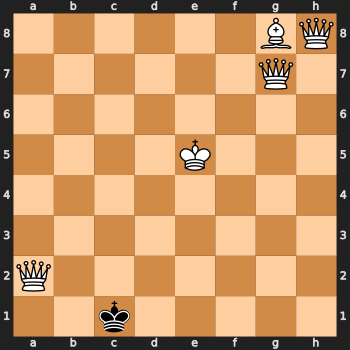

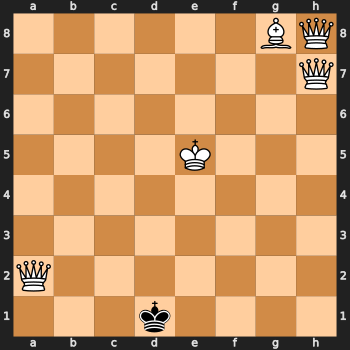

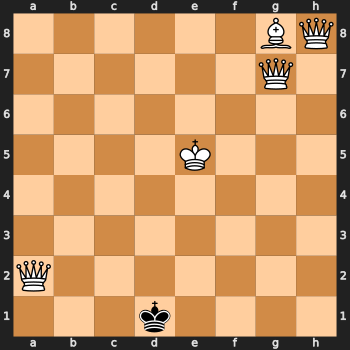

'1/2-1/2'

In [8]:
while not board.is_game_over():
    move=blancas.select_move(board)
    board.push(move)
    node = node.add_variation(move) # Add game node
    if not board.is_game_over():
        move=negras.select_move(board)
        board.push(move)
        node = node.add_variation(move) # Add game node
    #print(board)
    display(chess.svg.board(board,size=350))
    print("=="*8)
game.headers["Result"] = board.result()        
board.result()

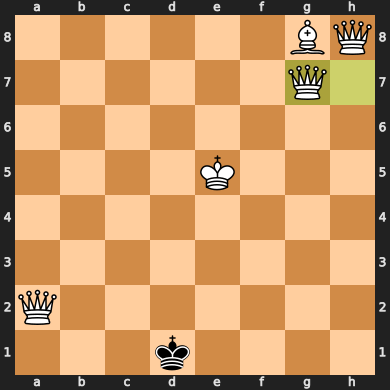

In [9]:
board

In [10]:
print(game)

[Event "?"]
[Site "?"]
[Date "????.??.??"]
[Round "?"]
[White "DeepBot"]
[Black "RandomBot"]
[Result "1/2-1/2"]

1. h4 c5 2. a3 Nh6 3. h5 f5 4. Rh4 a6 5. Re4 Nf7 6. Re6 h6 7. f4 d6 8. Kf2 a5 9. Ke3 Nd7 10. c3 c4 11. a4 Rg8 12. Ra3 Nc5 13. Rb3 Rb8 14. Rxb7 Qb6 15. Rd7 Qb7 16. Rxb7 d5 17. Kd4 Nb3+ 18. Qxb3 Rh8 19. Qb5+ Kd8 20. Na3 Bxe6 21. Nc2 Rh7 22. Qc5 Nh8 23. Qd6+ exd6 24. Ne3 Ra8 25. Nxd5 Bd7 26. e4 Ra6 27. Bd3 Nf7 28. e5 Bc6 29. Bxf5 Ng5 30. e6 Ra7 31. Rxa7 g6 32. hxg6 Rb7 33. Rxb7 Nh3 34. Nxh3 Be8 35. g4 Bg7+ 36. Ke4 Be5 37. Rh7 Bd4 38. Rh8 Bg7 39. Nb6 Bf6 40. Kd5 Bxh8 41. Nd7 Bf6 42. b4 axb4 43. Ba3 Be7 44. cxb4 c3 45. a5 Bf8 46. dxc3 Be7 47. b5 Bh4 48. b6 Ke7 49. a6 Bxd7 50. Bc5 Be8 51. a7 Kf8 52. g5 h5 53. Nf2 Kg8 54. Be4 Bxg6 55. Bxg6 Kg7 56. Bf7 Kh7 57. g6+ Kh6 58. f5 Bf6 59. Nh3 Bh4 60. f6 Bxf6 61. b7 Kg7 62. Nf2 dxc5 63. b8=Q Bd4 64. Qh8+ Kxh8 65. cxd4 Kg7 66. e7 Kh6 67. Be6 Kxg6 68. e8=Q+ Kg5 69. Qxh5+ Kf4 70. Qh8 c4 71. a8=Q Kg5 72. Nd3 Kg6 73. Nb2 c3 74. Bg8 Kg5 75. Be6 